In [8]:
import pandas as pd
import os
import librosa
import librosa.display


In [9]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [10]:
wavfilehelper = WavFileHelper()


In [11]:
fulldatasetpath = 'E:\\2021\\dataset\\audio'

metadata = pd.read_csv('E:\\2021\\dataset\\metadata\\metadata.csv')

In [12]:
audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('E:\\2021\\dataset\\audio'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

#Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [13]:
print(audiodf.num_channels.value_counts(normalize=True))

2    0.868690
1    0.131027
0    0.000284
Name: num_channels, dtype: float64


In [14]:
audiodf

,num_channels,sample_rate,bit_depth
0,2,44100,16
1,2,44100,16
2,2,44100,16
3,2,44100,16
4,2,44100,16
5,2,44100,16
6,2,44100,16
7,2,44100,16
8,2,44100,16
9,2,44100,16


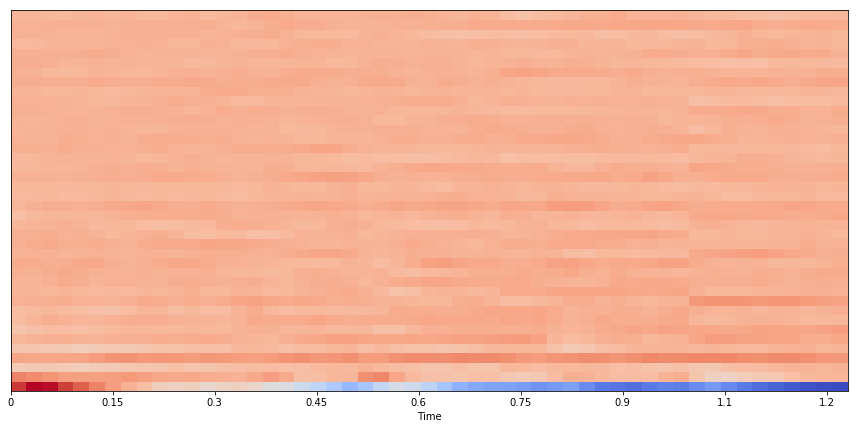

In [16]:
#mfcc for glass_breaking .wav file

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

file_name='E:\\2021\\dataset\\audio\\fold11\\7glass2.wav'

audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

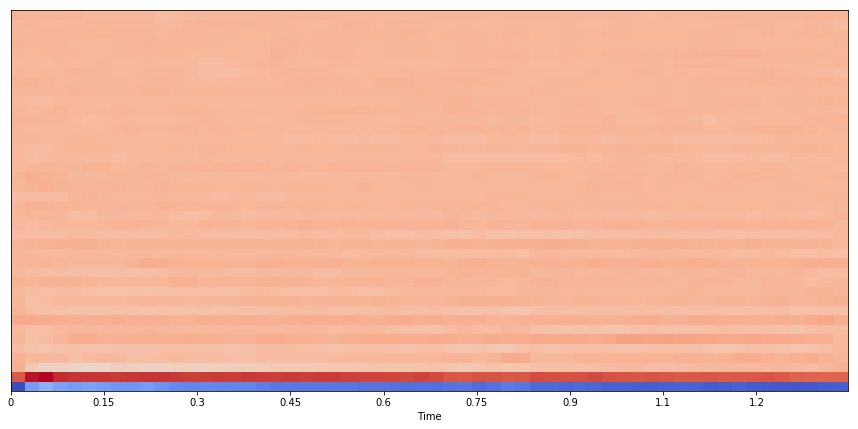

In [63]:
#mfcc for gunshot .wav file

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

file_name='E:\\2021\\UrbanSound8K\\audio\\fold10\\25037-6-0-0.wav'

audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [182]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file:",file_name)
        return None 
     
    return mfccsscaled
    
    


In [183]:
# Load various imports 
import pandas as pd
import os
import librosa
import numpy as np

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'E:\\2021\\dataset\\audio'

metadata = pd.read_csv('E:\\2021\\dataset\\metadata\\metadata.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

Finished feature extraction from  3518  files


In [184]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())



In [185]:

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 



In [186]:


from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)


In [187]:
yy.shape[1]

5

In [188]:
x_test.shape,x_train.shape

((704, 40), (2814, 40))

In [189]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import np_utils
from keras.utils import np_utils
from sklearn import metrics 

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [190]:

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               10496     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                

In [180]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((2820,), (2820, 5), (706,), (706, 5))

In [191]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/72
11/11 [==============================] - ETA: 12s - loss: 34.3688 - accuracy: 0.19 - ETA: 0s - loss: 25.1478 - accuracy: 0.2523 - ETA: 0s - loss: 21.3553 - accuracy: 0.288 - 2s 96ms/step - loss: 20.0266 - accuracy: 0.3021 - val_loss: 5.1448 - val_accuracy: 0.5653

Epoch 00001: val_loss improved from inf to 5.14476, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/72
11/11 [==============================] - ETA: 0s - loss: 12.5114 - accuracy: 0.406 - ETA: 0s - loss: 10.7615 - accuracy: 0.451 - ETA: 0s - loss: 9.5443 - accuracy: 0.474 - 0s 21ms/step - loss: 9.4131 - accuracy: 0.4783 - val_loss: 2.1683 - val_accuracy: 0.6364

Epoch 00002: val_loss improved from 5.14476 to 2.16833, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/72
11/11 [==============================] - ETA: 0s - loss: 8.9295 - accuracy: 0.44 - ETA: 0s - loss: 7.2510 - accuracy: 0.46 - ETA: 0s - loss: 6.5370 - accuracy: 0.46 - 0s 20ms/step - loss: 6.3668 - accuracy: 0.4758 - va

11/11 [==============================] - ETA: 0s - loss: 0.9072 - accuracy: 0.65 - ETA: 0s - loss: 0.8738 - accuracy: 0.66 - ETA: 0s - loss: 0.8656 - accuracy: 0.67 - 0s 20ms/step - loss: 0.8661 - accuracy: 0.6745 - val_loss: 0.7816 - val_accuracy: 0.7472

Epoch 00025: val_loss did not improve from 0.78072
Epoch 26/72
11/11 [==============================] - ETA: 0s - loss: 0.8864 - accuracy: 0.67 - ETA: 0s - loss: 0.8112 - accuracy: 0.69 - 0s 25ms/step - loss: 0.8250 - accuracy: 0.6859 - val_loss: 0.7655 - val_accuracy: 0.7472

Epoch 00026: val_loss improved from 0.78072 to 0.76545, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 27/72
11/11 [==============================] - ETA: 0s - loss: 0.8624 - accuracy: 0.66 - ETA: 0s - loss: 0.7996 - accuracy: 0.69 - 0s 16ms/step - loss: 0.7911 - accuracy: 0.6965 - val_loss: 0.7467 - val_accuracy: 0.7500

Epoch 00027: val_loss improved from 0.76545 to 0.74667, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 28/72



Epoch 00048: val_loss improved from 0.56304 to 0.54983, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 49/72
11/11 [==============================] - ETA: 0s - loss: 0.5901 - accuracy: 0.75 - ETA: 0s - loss: 0.6210 - accuracy: 0.76 - 0s 16ms/step - loss: 0.6223 - accuracy: 0.7612 - val_loss: 0.5331 - val_accuracy: 0.8068

Epoch 00049: val_loss improved from 0.54983 to 0.53307, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 50/72
11/11 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.75 - ETA: 0s - loss: 0.6039 - accuracy: 0.76 - 0s 16ms/step - loss: 0.5998 - accuracy: 0.7630 - val_loss: 0.5394 - val_accuracy: 0.8011

Epoch 00050: val_loss did not improve from 0.53307
Epoch 51/72
11/11 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.75 - ETA: 0s - loss: 0.6099 - accuracy: 0.76 - 0s 16ms/step - loss: 0.6095 - accuracy: 0.7687 - val_loss: 0.5262 - val_accuracy: 0.8026

Epoch 00051: val_loss improved from 0.533


Epoch 00072: val_loss did not improve from 0.43181
Training completed in time:  0:00:32.616373


In [204]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8610518574714661
Testing Accuracy:  0.8380681872367859


In [205]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [209]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None

    return np.array([mfccsscaled])

In [212]:
filename = 'E:\\2021\\dataset\\audio\\fold2\\76086-4-0-36.wav'
print_prediction(filename)

The predicted class is: drilling 

dog_bark 		 :  0.01914244703948497772216796875000
drilling 		 :  0.96431100368499755859375000000000
glass_breaking 		 :  0.00329884910024702548980712890625
gun_shot 		 :  0.01324514672160148620605468750000
jackhammer 		 :  0.00000268885059995227493345737457


In [213]:
filename = 'E:\\2021\\dataset\\audio\\fold2\\76090-6-1-0.wav'
print_prediction(filename)

The predicted class is: gun_shot 

dog_bark 		 :  0.29386383295059204101562500000000
drilling 		 :  0.17272800207138061523437500000000
glass_breaking 		 :  0.21439269185066223144531250000000
gun_shot 		 :  0.31107616424560546875000000000000
jackhammer 		 :  0.00793931726366281509399414062500
